# Data Loading

## Data loading with Pandas
Load `adult` dataset using Pandas.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data = pd.read_csv('/content/drive/MyDrive/Colab Datasets/adult.csv')

In [7]:
data.head()

,Unnamed: 0,age,workclass,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      32561 non-null  int64 
 1   age             32561 non-null  int64 
 2   workclass       32561 non-null  object
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   gender          32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Simple analysis
- Check the shape of the dataset, 
- list the column names count number of unique values in `income` column, 
- plot the histogram of age grouped by income

In [9]:
data.shape

(32561, 15)

In [10]:
data.columns

Index(['Unnamed: 0', 'age', 'workclass', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [11]:
data['education-num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education-num, dtype: int64

Majority of people have 9 years education

In [12]:
data.income.unique()

array([' <=50K', ' >50K'], dtype=object)

In [13]:
data.income.value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [14]:
import numpy as np
np.unique(data.income, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

I have 3 times more <50K then >50K \
imbalanced dataset \
canser dataset ---> 1000, 10\
if you trained a model for the cancer dataset \
99% 

dumb model ----> it assumes none cancer

accuracy, precision, recall, f_1score

in medicine if you consider the cost of FN as very high,

then you aim to maximize recall

income
 <=50K    Axes(0.125,0.125;0.775x0.755)
 >50K     Axes(0.125,0.125;0.775x0.755)
Name: age, dtype: object

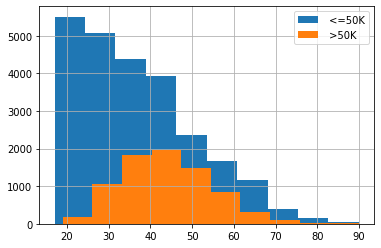

In [15]:
data.groupby('income').age.hist(legend=True)

# Splitting into training and test data

In [16]:
X = data.drop('income', axis=1)

In [17]:
X.shape, data.shape

((32561, 14), (32561, 15))

In [18]:
y = data.income

In [19]:
y.shape

(32561,)

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

In [34]:
X_train.shape

(29304, 14)

In [32]:
X_train.shape[0]/X.shape[0]*100

89.99723595712662

# Exercise I 
Load the "boston house prices" dataset from the ``boston_house_prices.csv`` file using the ``pd.read_csv`` function (you don't need ``index_column`` here).
You can find a description of this dataset in the ``boston_house_prices.txt`` file.

This is a regression dataset with "MEDV" the median house value in a block in thousand dollars the target.
How many features are there and how many samples?

Split the data into a training and a test set for learning.
Optionally you can plot MEDV vs any of the features using the ``plot`` method of the dataframe (using ``kind="scatter"``).

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
df_house = pd.read_csv('/content/drive/MyDrive/Colab Datasets/boston_house_prices.csv')

In [72]:
df_house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [73]:
df_house.shape

(506, 14)

In [74]:
Xh = df_house.drop('MEDV', axis=1)
yh = df_house.MEDV

In [75]:
Xh_train, Xh_test, yh_train, yh_test = train_test_split(Xh, yh, test_size=0.2)

In [76]:
import matplotlib.pyplot as plt

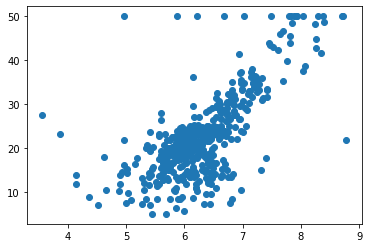

In [77]:
plt.scatter(df_house.RM, df_house.MEDV)


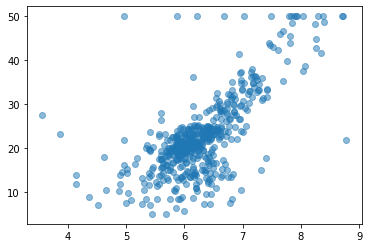

In [78]:
plt.scatter(df_house.RM, df_house.MEDV, alpha=0.5)

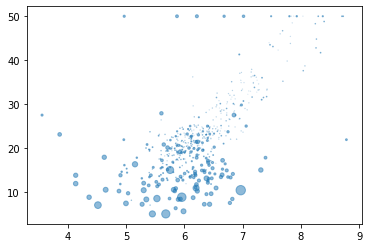

In [79]:
plt.scatter(df_house.RM, df_house.MEDV, alpha=0.5, s=df_house.CRIM)
#high crime rare area

## Load Datasets from ScikitLearn
Load digits dataset from sklearn

MNIST Dataset -----> handwritten digit dataset

In [80]:
# MNIST Dataset -----> handwritten digit dataset
from sklearn.datasets import load_digits

import numpy as np


In [81]:
digits = load_digits()

In [84]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [85]:
Xd = digits.data
yd = digits.target

In [89]:
Xd.shape

(1797, 64)

In [90]:
Xd[0] #first row of array

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [92]:
Xd[0].shape

(64,)

In [94]:
Xd[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

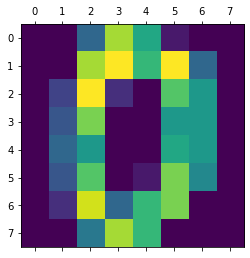

In [97]:
import matplotlib.pyplot as plt
plt.matshow(Xd[0].reshape(8,8))

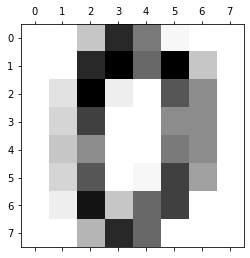

In [98]:
plt.matshow(Xd[0].reshape(8,8), cmap=plt.cm.Greys)

# Exercise II

Load the iris dataset from the ``sklearn.datasets`` module using the ``load_iris`` function.
The function returns a dictionary-like object that has the same attributes as ``digits``.

What is the number of classes, features and data points in this dataset?
Use a scatterplot to visualize the dataset.

You can look at ``DESCR`` attribute to learn more about the dataset.


In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

Number of classes: 3
Number of features: 4
Number of data points: 150


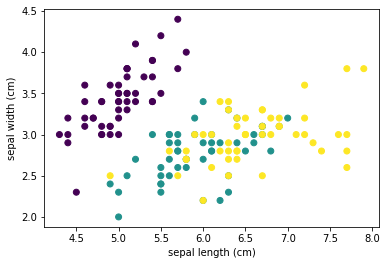

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [100]:
# Loading the iris dataset
iris = load_iris()

# Displaying the number of classes, features, and data points
print("Number of classes:", len(iris.target_names))
print("Number of features:", len(iris.feature_names))
print("Number of data points:", len(iris.data))

# Create a scatterplot
plt.scatter(iris.data[:,0], iris.data[:,1], c=iris.target)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

# Display dataset description
print(iris.DESCR)


X
X_train, X_test
KNeighborsClassifier
K?

Model1(K=1 X_train), test on X_test
Model2(K=3 X_train), test on X_test
Model3(K=5 X_train), test on X_test

X
X_train, X_test
X_train_val -----> X_train, X_val
Model1(K=1 X_train), test on X_val
Model2(K=3 X_train), test on X_val
Model3(K=5 X_train), test on X_val





1.   I used X_train to train model for a hyperparameter value set
2.   I use my X_val to measure the performance of the trained model for that hyperparameter value


FINAL: Test the model on the test data set before deploying
